In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
df=pd.read_csv('paindata.csv')
df.head()

,subject,test,label,label_time,feat1,feat2,feat3,feat4
0,1,1,1,1,1.200000,5.962879,5.939946,423.315903
1,1,1,1,2,1.200000,5.951589,5.950951,425.578340
2,1,1,1,3,1.162144,5.987670,5.950802,428.006194
3,1,1,1,4,1.157024,5.963077,6.012273,430.369485
4,1,1,1,5,1.170144,5.970446,5.974484,432.507971


In [3]:
#Subjectwise normalization can be done this way also
# featcols=['feat1','feat2','feat3','feat4']

# zscore =lambda x: (x - x.mean()) / x.std()
# a= df[df['subject']==1]
# a[featcols] = a[featcols].transform(zscore)
# a

In [4]:
#Feature normalization according to subjects
featcols=['feat1','feat2','feat3','feat4']
zscore =lambda x: (x - x.mean()) / x.std()

subject_wise_normlized = df.copy()

# sub_df_group = dfs.groupby(['subject'])
# subject_wise_normliz = pd.DataFrame() #Empty dataframe to append the normalized subjectwise dataframes
# for x in sub_df_group:
    
#     x[1][featcols]= x[1][featcols].transform(zscore) #Take the second parameter from the tuple, i.e, the features
#     subject_wise_normliz= pd.concat([subject_wise_normliz, x[1]]) 
    
# subject_wise_normliz

subject_wise_normlized[featcols] = subject_wise_normlized[featcols].groupby(subject_wise_normlized.subject).transform(zscore)
subject_wise_normlized

,subject,test,label,label_time,feat1,feat2,feat3,feat4
0,1,1,1,1,1.524262,0.051625,-0.549833,-1.246646
1,1,1,1,2,1.524262,-0.443984,0.002227,-1.229926
2,1,1,1,3,0.984724,1.139869,-0.005266,-1.211983
3,1,1,1,4,0.911751,0.060341,3.078269,-1.194518
4,1,1,1,5,1.098743,0.383784,1.182690,-1.178714
5,1,1,1,6,0.994757,-0.032254,0.824562,-1.163779
6,1,1,1,7,0.255229,-0.727961,0.707401,-1.148815
7,1,1,1,8,-0.051482,-0.175216,-1.217652,-1.132923
8,1,1,1,9,0.954167,-0.017394,-0.055520,-1.115205
9,1,1,1,10,0.494441,-0.790227,-1.674512,-1.094762


In [5]:
# implementation  of C_index
def c_index (true_labels, predictions):
    n = 0
    h_sum =0
    
    for i in range(len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        
        
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = predictions[j]
            
            if( t!=nt):
                n += 1
                
                if(p < np and t <  nt) or (p > np and t > nt):
                    h_sum += 1
                
                elif(p == np):
                    h_sum += 0.5
                
    c_index = h_sum/n
    return c_index

# Leave Subject Out Cross Validation

In [6]:
def leave_subject_out(dataset):
    
    c_index_dic={} #This will store the c index values for each subject
    for x in range(1,len(dataset.subject.unique())+1):
        test_data= dataset[dataset['subject'] == x] #Test and train data are complementary
        train_data=dataset[dataset['subject'] !=x]
        
        
        #Defining the train and test data
        featcols=['feat1','feat2','feat3','feat4']
        x_test=test_data[featcols]  
        y_test=test_data['label']
        x_train=train_data[featcols]
        y_train=train_data['label']
        
        
        #Fitting the knn model and predicting c indexes for each subject
        knn=KNeighborsClassifier(n_neighbors=37, metric='euclidean')
        knn.fit(x_train,y_train)
        pred_class=knn.predict(x_test)
        
       #Calling the c index function for evaluation
        c_ind= c_index(y_test.values, pred_class)
        c_index_dic[x]= c_ind # c index of each subject 

    ci_df = pd.DataFrame(list(c_index_dic.items()), columns=['subject_id', 'c-index']) #c index of each subject in dataframe
    
    return ci_df
        
    
        

        
        
        
    
        
        

In [7]:

subjectwise_CI=leave_subject_out(subject_wise_normlized)
subjectwise_CI

,subject_id,c-index
0,1,0.764118
1,2,0.572407
2,3,0.519044
3,4,0.686840
4,5,0.592664
5,6,0.487676
6,7,0.664114
7,8,0.670057
8,9,0.529903
9,10,0.578952


In [8]:
print('The highest c index is for subject',subjectwise_CI['c-index'].idxmax(), 'and the corresponding value is',
     subjectwise_CI['c-index'].max()) 
print('\n')
print('The lowest c index is for subject',subjectwise_CI['c-index'].idxmin(), 'and the corresponding value is',
     subjectwise_CI['c-index'].min()) 
print('\n')
print('The avearage of the c index is ',subjectwise_CI['c-index'].mean())
print('\n')
print('The standard deviation of the c index is',     subjectwise_CI['c-index'].std()) 

The highest c index is for subject 27 and the corresponding value is 0.8156826256132634


The lowest c index is for subject 5 and the corresponding value is 0.48767583717166685


The avearage of the c index is  0.6284986193061237


The standard deviation of the c index is 0.08403091541218048


(-0.5, 32.5)


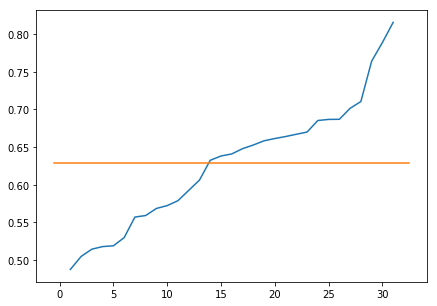

In [9]:
#Checking the performance. The plot shows highest, lowest and the average values and the overall variation of c indexes.
import matplotlib.pyplot as plt
axes=plt.figure(figsize=(7,5))

y= subjectwise_CI['c-index'].sort_values()
x= subjectwise_CI['subject_id']

plt.plot(x,y)
axes=plt.gca()
print(axes.get_xlim())

plt.plot(axes.get_xlim(), [subjectwise_CI['c-index'].mean(),subjectwise_CI['c-index'].mean()])#This will draw the mean line
plt.show()

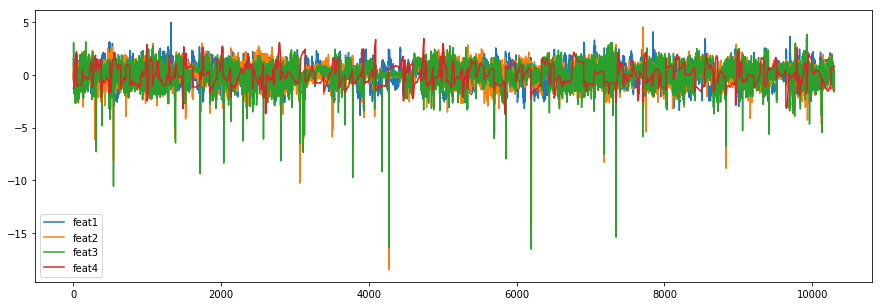

In [10]:
#Plotting the features
subject_wise_normlized[featcols].plot(figsize=(15,5));

# Conclusion
Here I have used the sklearn library for fitting the KNN algorithm. Here the features are normalized subject wise. I have calculated the highest and lowest values of c indexes and the mean. 